In [1]:
%matplotlib inline
import numpy as np 

from astropy.table import Table, Column
import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

from glob import glob

In [2]:
use1sig = False
ecolor = plt.cm.Greys(0.6)
color = plt.cm.Greys(0.8)
fs = 16 
al = 1

In [3]:
def add_model(ax, ion, model_cs=['k', plt.cm.Greys(0.6)], 
              model_labels = ['Model A', 'Model B'], 
              model_ls = ['-', '--'], model_lw=[2.5, 2.5]): 
    from astropy.table import Table
    
    model1 = Table.read('data/empirical_models/dwarfs_s2_model_1.txt', format='ascii')
    model2 = Table.read('data/empirical_models/dwarfs_s2_model_2.txt', format='ascii')
    
    bnorm1 = model1['b/r200m']
    bnorm2 = model2['b/r200m']
    logN1 = model1['logN({})'.format(ion)]
    logN2 = model2['logN({})'.format(ion)]
    
    #model_labels = [r'A: high $M_{\rm CGM}$ low $\alpha$', 
    #                r'B: low $M_{\rm CGM}$ high $\alpha$']
    #model_cs = ['steelblue', plt.cm.Reds(0.7)]
    
    #model_cs = ['b', 'r']
    #model_cs = ['k', plt.cm.Greys(0.6)]
    #model_ls = ['-', '--']
    ax.plot(bnorm1, logN1, color=model_cs[0], ls=model_ls[0], lw=model_lw[0], 
            label=model_labels[0])
    ax.plot(bnorm2, logN2, color=model_cs[1], ls=model_ls[1], lw=model_lw[1], 
            label=model_labels[1])
    return ax 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


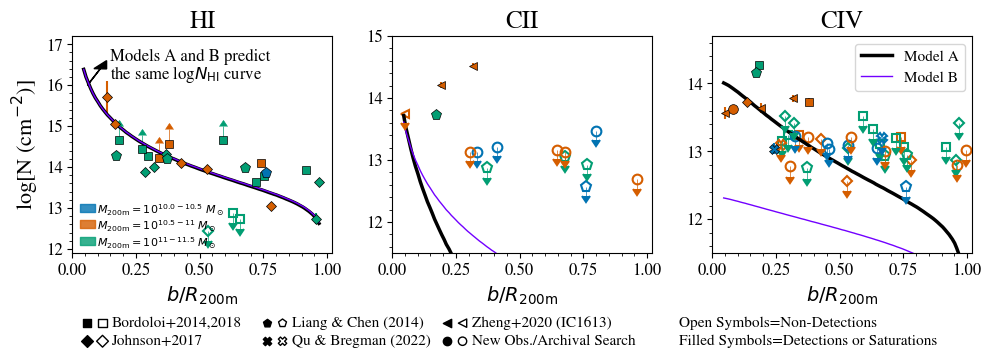

In [4]:
from load_cgm_dwarf_mod import init_logN_rho_plot_3panel
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

ions = ['HI', 'CII', 'CIV']
fig, axes, ylims = init_logN_rho_plot_3panel(fs=fs, ions=ions)
for j in range(len(ions)): 
    ion = ions[j]
    ax = axes[j]
    
    # add empirical model 
    ax = add_model(ax, ion, 
                   model_cs=['k', plt.cm.hsv(0.75)], 
                   model_labels = ['Model A', 'Model B'], 
                   model_ls = ['-', '-'], 
                   model_lw = [2.5, 1])
    
    ### add data 
    ax, file_label = plot_obsdata(ax, ion, use1sig=use1sig, 
                                  ecolor=ecolor, color=color, 
                                  fs=fs, al=al, 
                                  add_legend_byhand=True)
    
    ## add legend
    #ytext = ylims[ion][file_label][1] - 0.15*(ylims[ion][file_label][1] - ylims[ion][file_label][0])
    #ax.text(0.8, ytext, ion, fontsize=fs+2)
    ax.set_title(ion, fontsize=fs+2)
    ax.set_xlabel(r'$b/R_{\rm 200m}$', fontsize=fs-2)
    ax.set_ylim(ylims[ion][file_label][0], ylims[ion][file_label][1])
    #ax.axvline(0.1)

### add HI annotation 
axes[0].text(0.15, 16.6, r'Models A and B predict', fontsize=fs-4)
axes[0].text(0.15, 16.15, r'the same log$N_{\rm HI}$ curve', fontsize=fs-4)
axes[0].arrow(0.06, 16, 0.05, 0.4, color='k', head_width=0.05, head_length=0.2)

###
ax_ll = axes[-1]
ax_ll.legend(loc='upper right', fontsize=fs-5)

fig.savefig('figs/fig6_empirical_logN_{}_3panel_0.3Zsun.pdf'.format(file_label))

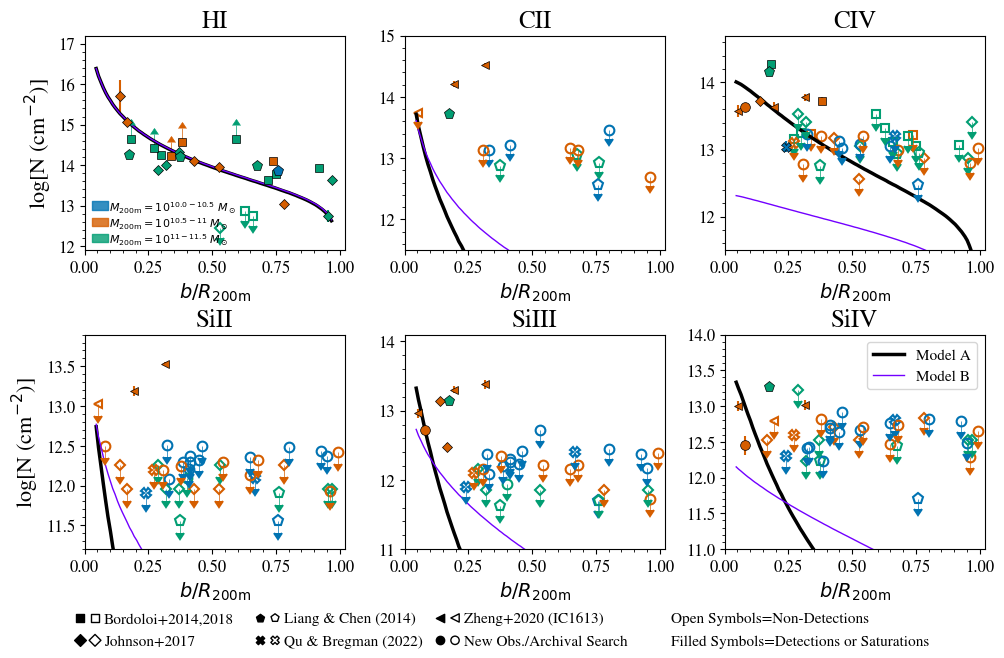

In [5]:
from load_cgm_dwarf_mod import init_logN_rho_plot_6panel
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

ions = ['HI', 'CII','CIV', 'SiII', 'SiIII', 'SiIV']
fig, axes, ylims = init_logN_rho_plot_6panel(fs=fs, ions=ions)
for j in range(len(ions)): 
    ion = ions[j]
    ax = axes[j]
    
    # add empirical model 
    ax = add_model(ax, ion, 
                   model_cs=['k', plt.cm.hsv(0.75)], 
                   model_labels = ['Model A', 'Model B'], 
                   model_ls = ['-', '-'], 
                   model_lw = [2.5, 1])
    
    ### add data 
    ax, file_label = plot_obsdata(ax, ion, use1sig=use1sig, 
                                  ecolor=ecolor, color=color, 
                                  fs=fs, al=al, 
                                  add_legend_byhand=True)
    
    ## add legend
    #ytext = ylims[ion][file_label][1] - 0.15*(ylims[ion][file_label][1] - ylims[ion][file_label][0])
    #ax.text(0.8, ytext, ion, fontsize=fs+2)
    ax.set_title(ion, fontsize=fs+2)
    ax.set_xlabel(r'$b/R_{\rm 200m}$', fontsize=fs-2)
    ax.set_ylim(ylims[ion][file_label][0], ylims[ion][file_label][1])
    #ax.axvline(0.1)

ax_ll = axes[-1]
ax_ll.legend(loc='upper right', fontsize=fs-5)

fig.savefig('figs/fig6_empirical_logN_{}_6panel_0.3Zsun.pdf'.format(file_label))